# t-SNE transformation offline

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [22]:
DATASET_PATH = '../data/randomsplit/train/'


float_numbers = [
    '4903052',
    '4903054',
    '4903058',
    '4903215',
    '4903217',
    '4903218',
    '4903220'
]

float_number = float_numbers[6]
# 0, 1, 2, 3, 4, 5, 6 is done


### Transform data to t-SNE features (Offline)

-------- 4903220 --------


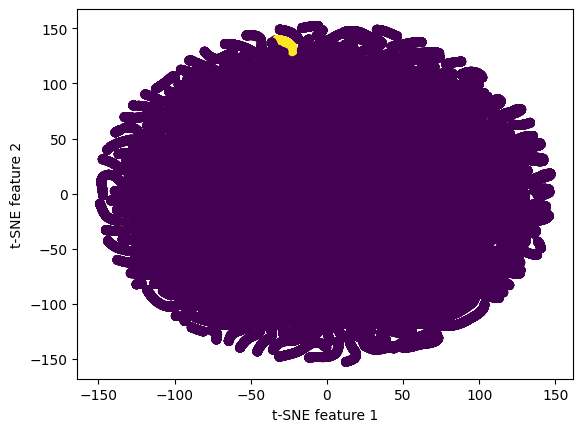

In [23]:
# Load the data
raw_data = pd.read_csv(os.path.join(DATASET_PATH, f'PR_PF_{float_number}.csv'))
# data = raw_data[:100]
data = raw_data

# Separate the target variable from the features
features = data.drop(columns=['ID', 'Date', 'Label'], axis=1)

# Reduce the dimension to 2 using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(features)

# Save the tsne features
tsne_file = os.path.join(DATASET_PATH, 'tsne_features', f'PR_PF_{float_number}')
np.save(tsne_file, tsne_features)


In [ ]:
# Visualize the data
print(f'-------- {float_number} --------')
target = data['Label']
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=target)
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()